<a href="https://colab.research.google.com/github/emirsav/ProjectNumericalMethods2023/blob/main/Project_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
from itertools import combinations
from IPython import display

In [19]:
nParticles =400                            #creating particles
r = np.random.random((2,nParticles))
ixr = r[0]>0.5 #right
ixl = r[0]<=0.5 #left

In [20]:
ids = np.arange(nParticles)                #giving ids to particles

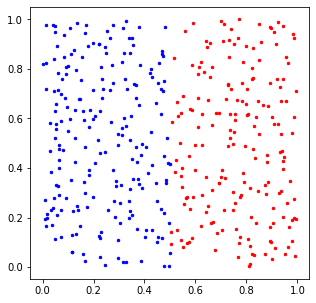

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr],r[1][ixr], color='r', s=6) #color red for particles in right
plt.scatter(r[0][ixl],r[1][ixl], color='b', s=6) #colort blue for particles in left

In [22]:
v = np.zeros((2,nParticles))       #velocity of particles
v[0][ixr] = -500                    #particles in gas move aprox. 500m/s
v[0][ixl] = 500

In [23]:
idsPairs = np.asarray(list(combinations(ids,2))) #creating all possible pairs ((400*399)/2)

In [24]:
xPairs = np.asarray(list(combinations(r[0],2))) #x values of pairs
yPairs = np.asarray(list(combinations(r[1],2))) #y values of pairs

In [25]:
dxPairs = np.diff(xPairs, axis=1).ravel() #difference of x to get delta
dyPairs = np.diff(yPairs, axis=1).ravel() #difference of y to get delta
dPairs = np.sqrt(dxPairs**2 + dyPairs**2) #formula of total distance

In [26]:
radius = 0.0015
idsPairsCollide = idsPairs[dPairs < 2*radius] #checking if the colision occured

In [27]:
v1 = v[:,idsPairsCollide[:,0]]  #particles in left=1, particles in right=2
v2 = v[:,idsPairsCollide[:,1]]
r1 = r[:,idsPairsCollide[:,0]]
r2 = r[:,idsPairsCollide[:,1]]

In [28]:
v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2) #implementing the formula
v2new = v2 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)

In [29]:
def get_delta_pairs(x):
    return np.diff(np.asarray(list(combinations(x,2))), axis=1).ravel()   #distance between delta x or y

def get_deltad_pairs(r):
    return np.sqrt(get_delta_pairs(r[0])**2 + get_delta_pairs(r[1])**2)   # eucledian distance formula

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))  #ts= time steps(pictures taken in 2d)
    vs = np.zeros((ts, v.shape[0], v.shape[1]))
                                                  # Initial State
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,ts):
        ic = id_pairs[get_deltad_pairs(r) < d_cutoff] #ic=index coliision
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1]) #making box elastic,if a particle touches box it returns with same velocity
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        r = r + v*dt                        #movement
        rs[i] = r.copy()                    #sacing position and velocity for animation
        vs[i] = v.copy()
    return rs, vs

In [30]:
rs, vs = motion(r, v, idsPairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

In [31]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()                                                                                        #clearing axis
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]                                                         #positiions of red and blue particles
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circlesRed = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]      #creating circles
    circlesBlue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circlesRed, facecolors='red')                      #adding circles to plt
    cblue = matplotlib.collections.PatchCollection(circlesBlue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)                                                                                  #limits the axis
    ax.set_ylim(0,1)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)
video = ani.to_html5_video()          #converting animation to html 
html = display.HTML(video)
display.display(html)
plt.close()   


In [32]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2                   #a=m/kT
fv = a*v*np.exp(-a*v**2 / 2)   #fv=m/kT*v*exp(-m/kT*v**2/2)  

Text(0, 0.5, '# Particles')

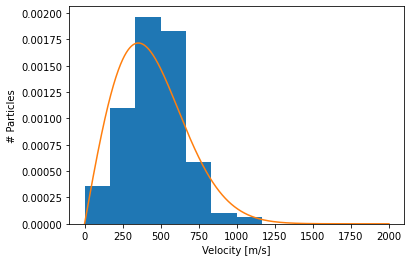

In [33]:
bins = np.linspace(0,1500,10)        #creating histogram
plt.figure()
plt.hist(np.sqrt(np.sum(vs[400]**2, axis=0)), bins=bins, density=True) #time steps of histogram
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

def animate(i):                                                                      #Animating the first animation and histogram together
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.plot(v,fv)
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)
video = ani.to_html5_video()          #converting animation to html 
html = display.HTML(video)
display.display(html)
plt.close()   

